In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

In [104]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    x2_min, x2_max = X[:, 1].min()-.1, X[:, 1].max()+.1
    X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 200), 
                         np.linspace(x2_min, x2_max, 200))
    X_new = np.c_[X1.ravel(), X2.ravel()]
    Y_new = clf.predict(X_new).reshape(X1.shape)
    
    plt.contourf(X1, X2, Y_new, alpha=.2, cmap=plt.cm.brg)#, colors=colors)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, alpha=.7, edgecolors='k') 
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

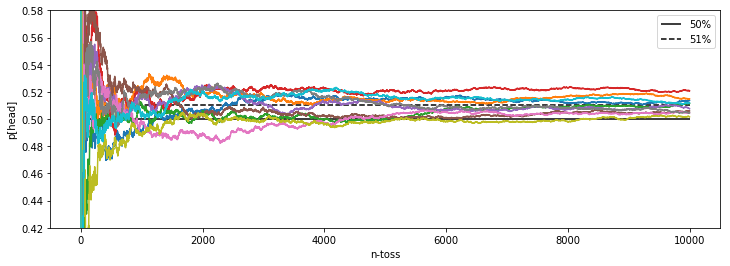

In [3]:
p_head = .51
n_toss, n_coin = 10000, 10

coin_10 = (np.random.rand(n_toss, n_coin) < p_head).astype(np.int32)

coin_10 = coin_10.cumsum(axis=0) / np.arange(1, n_toss+1)[:, None]

plt.figure(figsize=(12, 4))
plt.plot(coin_10)
plt.xlabel('n-toss')
plt.ylabel('p[head]')
plt.ylim([.42, .58])

plt.hlines(.50, 0, 10000, colors='k', linestyles='-', label='50%')
plt.hlines(.51, 0, 10000, colors='k', linestyles='--', label='51%')
plt.legend(loc='best')

#### voting classifiers

In [4]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
X.shape, y.shape

((500, 2), (500,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((375, 2), (375,), (125, 2), (125,))

Text(0,0.5,'$x_2$')

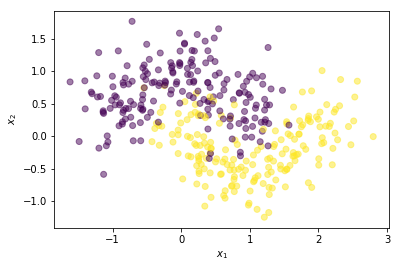

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [7]:
log_reg = LogisticRegression()
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier()

hard_voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svm_clf', svm_clf),
        ('rf_clf', rf_clf)
    ], 
    voting='hard')

soft_voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svm_clf', svm_clf),
        ('rf_clf', rf_clf)
    ], 
    voting='soft')

In [8]:
for clf in [log_reg, svm_clf, rf_clf, hard_voting_clf, soft_voting_clf]:
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    print("{}: {:.2f} +/- {:.2f} accuracy".format(clf.__class__.__name__, 
                                                  scores.mean(), 
                                                  2*scores.std()))

LogisticRegression: 0.84 +/- 0.07 accuracy
SVC: 0.90 +/- 0.06 accuracy
RandomForestClassifier: 0.89 +/- 0.07 accuracy


C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continu

VotingClassifier: 0.90 +/- 0.06 accuracy


C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continu

VotingClassifier: 0.91 +/- 0.07 accuracy


C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LENOVO\AppData\Local\Continu

#### Bagging and Pasting

In [9]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1)

In [10]:
scores = cross_val_score(bag_clf, X, y, scoring='accuracy', cv=10)

In [11]:
scores

array([0.94, 0.92, 0.9 , 0.92, 0.96, 0.94, 0.94, 0.88, 0.88, 0.92])

In [12]:
np.mean(scores)

0.9199999999999999

#### Out-of-Bag Evaluation

In [13]:
1 - 1/np.e

0.6321205588285577

In [14]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [15]:
bag_clf.oob_score_

0.9226666666666666

In [16]:
bag_clf.score(X_test, y_test)

0.928

#### Random Forests

In [39]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)

In [20]:
scores = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv=10)

In [21]:
scores

array([0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.86842105,
       0.89473684, 0.94594595, 0.94594595, 0.89189189, 0.88888889])

In [22]:
scores.mean()

0.9172672672672672

In [40]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
rf_clf.score(X_test, y_test)

0.92

In [35]:
bag_clf = BaggingClassifier(
                base_estimator=DecisionTreeClassifier(splitter='random', max_leaf_nodes=16, random_state=42), 
                n_estimators=500, 
                bootstrap=True, 
                max_samples=1.0, oob_score=True, 
                random_state=42)

In [36]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [37]:
bag_clf.oob_score_, bag_clf.score(X_test, y_test)

(0.92, 0.92)

#### Extra-Trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
extree_clf = ExtraTreesClassifier(n_estimators=500, max_depth=5)

In [56]:
extree_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
extree_clf.score(X_train, y_train)

0.8826666666666667

In [58]:
extree_clf.score(X_test, y_test)

0.872

#### Feature Importance

In [59]:
iris = datasets.load_iris()

X, y = iris.data, iris.target

In [60]:
X.shape, y.shape

((150, 4), (150,))

In [64]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
pd.Series(rf_clf.feature_importances_, index=iris.feature_names)

sepal length (cm)    0.087656
sepal width (cm)     0.022792
petal length (cm)    0.432759
petal width (cm)     0.456792
dtype: float64

In [66]:
from keras.datasets.mnist import load_data

In [67]:
(X_mnist, y_mnist), (_, _) = load_data()

In [70]:
X_mnist = X_mnist.reshape((len(X_mnist), -1))
X_mnist.shape

(60000, 784)

In [72]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_mnist, y_mnist)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
pixel_feature_imp = rf_clf.feature_importances_.reshape((28, 28))

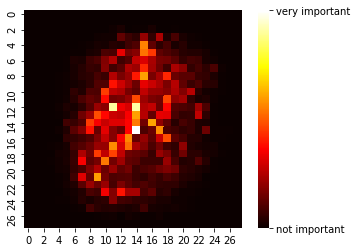

In [89]:
ax = sns.heatmap(pixel_feature_imp, square=True, 
                annot=False, cmap=plt.cm.hot) 

cbar = ax.collections[0].colorbar
cbar.set_ticks([rf_clf.feature_importances_.min(), rf_clf.feature_importances_.max()])
cbar.set_ticklabels(['not important', 'very important'])

#### AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    learning_rate=.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

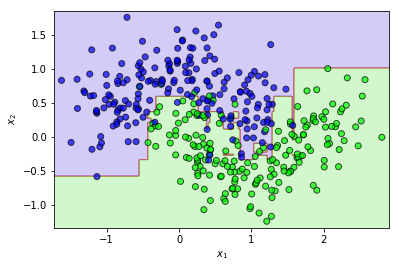

In [102]:
plot_decision_boundary(ada_clf, X_train, y_train)

Text(0.5,1,'learning rate: 0.75')

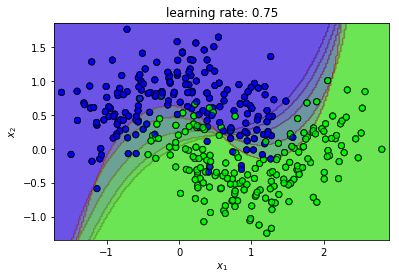

In [122]:
learning_rate = .75
current_w = np.ones(len(X_train))
for i in range(5):
    svm = SVC(C=.05, kernel='rbf')
    svm.fit(X_train, y_train, sample_weight=current_w)
    y_pred = svm.predict(X_train)
    current_w[y_pred != y_train] *= (1 + learning_rate)
    
    plot_decision_boundary(svm, X_train, y_train)
plt.title('learning rate: {}'.format(learning_rate))

In [120]:
current_w

array([1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 7.59375,
       1.     , 1.     , 3.375  , 7.59375, 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 7.59375, 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 7.59375, 1.     , 7.59375, 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 5.0625 , 1.     ,
       7.59375, 1.     , 1.     , 1.     , 1.     , 2.25   , 1.     ,
       1.     , 5.0625 , 1.     , 5.0625 , 1.     , 3.375  , 1.     ,
       1.     , 1.     , 1.     , 1.     , 3.375  , 1.     , 5.0625 ,
       1.     , 1.     , 7.59375, 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.5    , 1.     , 5.0625 , 7.59375, 1.     ,
       1.     , 5.06

In [117]:
plt.scatter()

['__lt__',
 '__reduce__',
 'n_classes_',
 '_abc_negative_cache',
 '__subclasshook__',
 '__abstractmethods__',
 '__gt__',
 '_abc_negative_cache_version',
 '__ne__',
 '__dict__',
 'n_estimators',
 'learning_rate',
 '__len__',
 'feature_importances_',
 'score',
 '_validate_estimator',
 'random_state',
 'predict_log_proba',
 '__module__',
 'estimators_',
 '_boost_discrete',
 'classes_',
 '_boost',
 'get_params',
 '_estimator_type',
 '__ge__',
 '_abc_registry',
 'staged_predict_proba',
 '__iter__',
 'set_params',
 '__class__',
 'decision_function',
 '__dir__',
 '__le__',
 '__doc__',
 '_boost_real',
 '__sizeof__',
 'fit',
 '__format__',
 '__getattribute__',
 'algorithm',
 '__delattr__',
 '__hash__',
 'staged_predict',
 '_make_estimator',
 'estimator_weights_',
 'base_estimator_',
 '__setstate__',
 'estimator_errors_',
 'predict_proba',
 '__getitem__',
 'staged_decision_function',
 '__eq__',
 '_validate_X_predict',
 '__repr__',
 '__new__',
 'staged_score',
 'estimator_params',
 'predict',
 '_

#### Gradient Boosting

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
def plot_regression_line(clf, X, y):
    x0_min, x0_max = X.min()-.1, X.max()+.1
    x_new = np.linspace(x0_min, x0_max, 500)[:, None]
    y_new = clf.predict(x_new)
    
    plt.plot(X, y, 'b.', alpha=.7, label='training set')
    plt.plot(x_new, y_new, 'r-', label='$h_1(x_1)$')
    plt.legend()
    plt.xlabel('$x_1$')
    plt.ylabel('$y$')

In [128]:
m = 100
X = np.random.rand(m, 1) -.5           # x -> [-5, 5]
y = (3*X**2 + 0.05*np.random.randn(m, 1)).ravel()

Text(0.5,0,'y')

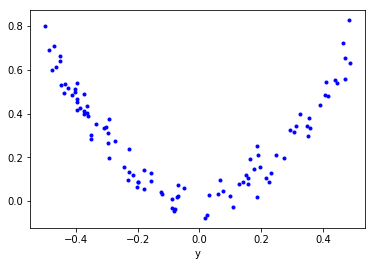

In [129]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.xlabel('y')

In [132]:
gb_reg = GradientBoostingRegressor(n_estimators=3, learning_rate=1.0, max_depth=2)

In [133]:
gb_reg.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [134]:
gb_reg.score(X, y)

0.9074328845891602

Text(0.5,1,'GradientBoosting')

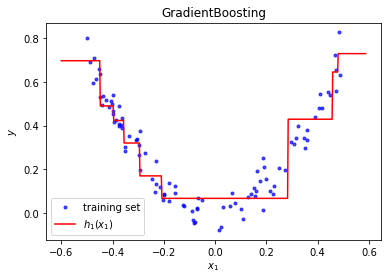

In [144]:
plot_regression_line(gb_reg, X, y)
plt.title('GradientBoosting')

Text(0.5,1,'DecisionTree')

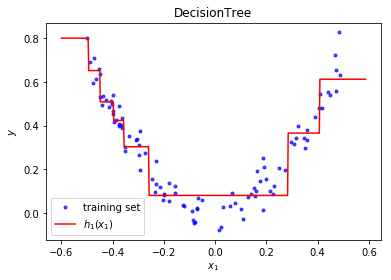

In [143]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

plot_regression_line(tree_reg, X, y)
plt.title('DecisionTree')

Text(0.5,1,'n_estimators=3, learning_rate=0.1')

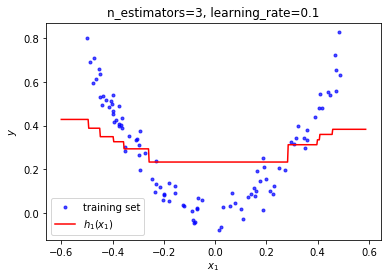

In [149]:
gb_reg = GradientBoostingRegressor(n_estimators=3, learning_rate=.1)
gb_reg.fit(X, y)

plot_regression_line(gb_reg, X, y)
plt.title("n_estimators={n_estimators}, learning_rate={learning_rate}".format(**gb_reg.get_params()))

Text(0.5,1,'n_estimators=300, learning_rate=0.1')

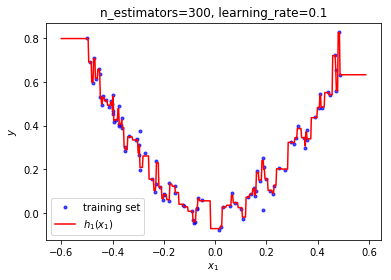

In [163]:
gb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=.1)
gb_reg.fit(X, y)

plot_regression_line(gb_reg, X, y)
plt.title("n_estimators={n_estimators}, learning_rate={learning_rate}".format(**gb_reg.get_params()))

#### Early Stopping

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

gb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=.1)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [165]:
stage_erros = [mean_squared_error(y_val, y_pred) for y_pred in gb_reg.staged_predict(X_val)]

In [167]:
best_n_estimators = np.argmin(stage_erros)
best_n_estimators

29

In [168]:
stage_erros[best_n_estimators]

0.0036640602222642

In [169]:
stage_erros[-5:]

[0.008387021771451862,
 0.008389995884016956,
 0.008389979781118044,
 0.008396326573258773,
 0.008397388907383473]

Text(0.5,1,'n_estimators=29, learning_rate=0.1')

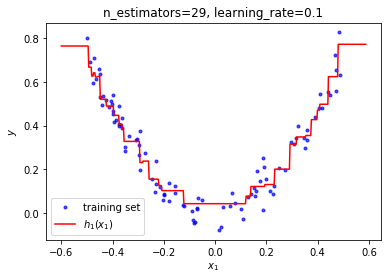

In [170]:
gb_reg = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=.1)
gb_reg.fit(X_train, y_train)

plot_regression_line(gb_reg, X, y)
plt.title("n_estimators={n_estimators}, learning_rate={learning_rate}".format(**gb_reg.get_params()))

Text(0,0.5,'mse')

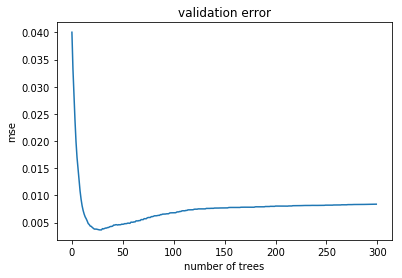

In [172]:
plt.plot(stage_erros)
plt.title('validation error')
plt.xlabel('number of trees')
plt.ylabel('mse')

In [202]:
gb = GradientBoostingRegressor(max_depth=2, learning_rate=1, warm_start=True)

min_mse = np.inf
non_progress_count = 0
for n in range(1, 220):
    gb.n_estimators = n
    gb.fit(X_train, y_train)
    val_mse = mean_squared_error(y_val, gb.predict(X_val))
    if val_mse < min_mse:
        min_mse = val_mse
        non_progress_count = 0
    else:
        non_progress_count =+ 1
    
    if non_progress_count == 5:
        break

In [204]:
gb.n_estimators, non_progress_count, min_mse

(219, 1, 0.005458021068255445)

#### Exercises

#### ex.9

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

from scipy import stats

In [16]:
# load mnist dataset
from keras.datasets.mnist import load_data


(X_train, y_train), (X_test, y_test) = load_data()

X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [17]:
# create validation set: 10000 samples
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [18]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 784), (10000, 784), (50000,), (10000,))

In [19]:
# preprocess data: transform scale X[0-255] -> X[0-1]
#                : standard scaler (option 2)

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train.astype(float))
X_val_std = std_scaler.transform(X_val.astype(float))
X_test_std = std_scaler.transform(X_test.astype(float))

In [46]:
# candidate models: 
# - random forest
# - svm
# - extra-tree
# - gradient boosting
# - adaboost
# - neural network

In [47]:
rf_clf = RandomForestClassifier(n_estimators=500, min_samples_split=10, random_state=42)
rf_clf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_std, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
extree_clf = ExtraTreesClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
nn_clf = MLPClassifier(random_state=42, early_stopping=True)
svm_clf = LinearSVC(dual=False, random_state=42)

In [50]:
extree_clf.fit(X_train_std, y_train)
ada_clf.fit(X_train_std, y_train)
nn_clf.fit(X_train_std, y_train)
svm_clf.fit(X_train_std, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [52]:
for model in [rf_clf, gb_clf, extree_clf, ada_clf, svm_clf, nn_clf]:
    val_acc = model.score(X_val_std, y_val)
    print("{} : {:.4f}".format(model.__class__.__name__, val_acc))

RandomForestClassifier : 0.9681
GradientBoostingClassifier : 0.9472
ExtraTreesClassifier : 0.9507
AdaBoostClassifier : 0.7255
LinearSVC : 0.9108
MLPClassifier : 0.9729


In [54]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('extree', extree_clf),
    #('ada', ada_clf),
    ('nn', nn_clf),
    ('svm', svm_clf)
], voting='hard')

In [55]:
voting_clf.fit(X_train_std, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_w... max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [56]:
voting_clf.score(X_val_std, y_val)

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9687

In [65]:
voting_clf.score(X_test_std, y_test)

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9658

#### ex.9

In [57]:
first_layer_models = [
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('extree', extree_clf),
    #('ada', ada_clf),
    ('nn', nn_clf),
    ('svm', svm_clf)
]

In [58]:
val_pred_training_set = np.zeros(shape=(len(X_val), len(first_layer_models)))
for i, (_, clf) in enumerate(first_layer_models):
    val_pred_training_set[:, i] = clf.predict(X_val_std)
    

In [59]:
val_pred_training_set[:5]

array([[7., 7., 7., 7., 7.],
       [3., 3., 3., 3., 3.],
       [8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9.],
       [3., 3., 3., 3., 3.]])

In [60]:
rf_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rf_blender.fit(val_pred_training_set, y_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [61]:
rf_blender.oob_score_

0.9706

In [62]:
# test stacking model on test set
test_pred_L1 = np.zeros(shape=(len(X_test), len(first_layer_models)))

for i, (_, clf) in enumerate(first_layer_models):
    test_pred_L1[:, i] = clf.predict(X_test_std)
    
final_pred = rf_blender.predict(test_pred_L1)

In [64]:
rf_blender.score(test_pred_L1, y_test)

0.9685